# Exercise Sheet 3

## Machine learning basics

### Deadline: 02.12.2020 23:59

**Instructions:**
Insert your code in the *TODO* sections ans type your answers in the *Answer* cells. <br>

1. Bernadeta Griciūtė (XX)
2. Zena Al Khalili (XX)
3. Sangeet Sagar (XX

{XX,XX,sasa00001}@stud.uni-saarland.de

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, log_loss
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

## 1 Implementing regression

In this exercise we will practice implementing regression on the Titanic dataset using the package *sklearn*. <br>
<a href="https://www.kaggle.com/c/titanic">Titanic dataset </a> contains the data about passengers of the ship and information whether they survived or not. <br>
In the materials for this exercise you can find the file *titanic.csv*. This file contains preprocessed data with information about passenger ID, age, class, and *price* of their ticket.

**1.1 Load the data as a pandas dataframe, using <a href = "https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html">read_csv</a> method**

In [2]:
# TODO: load the data into the varible 'titanic', have a look at the data
titanic = pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Age,Price
0,1,0,3,22.0,7.2500
1,2,1,1,38.0,71.2833
2,3,1,3,26.0,7.9250
3,4,1,1,35.0,26.5500
4,5,0,3,35.0,8.0500


**Look at the data and report which variables are continuous, nominal, ordinal. (0.5 points)** 

*Answer:* 
- continious variable- **Age**, **Price**. It can take on an unlimited number of values between the lowest and highest points of measurement
- nominal variables- **Survived**. It has 2 categories but there's no intrinsic ordering for the categories
- ordinal variables- **Pclass**. It has 3 categories with the ability to order the categories.

**PassangerId** is not a variable, it indicates the indivisual in the data set. <br>

**1.2 Here we will implement a simple linear regression and try to see if we can predict the *price* of the ticket based on the *age* of the passenger (0.5 points)** <br>
Consult the documentation on <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html">LinearRegression class </a> in sklearn

In [3]:
# TODO:
# 1) create an instance of LinearRegression class
# 2) fit the model to predict Price of the ticket from Age of the passenger
#    (consult the METHODS section in the documentation)
# Hint: it might be the case that you will have to reshape your data using .reshape(-1, 1).
#    You can create separate numpy arrays containing only Age and Price and reshape them if needed.

lr = LinearRegression()
X = titanic["Age"].to_numpy().reshape(-1, 1) # Training data
y_true = titanic["Price"].to_numpy().reshape(-1, 1) # Target values
lr.fit(X, y_true)
y_pred = lr.predict(X)


**What are the parameters of the model that we fit? Hint: the parametrs are the attributes of the model, consult the documentation.**

In [4]:
# TODO: Get the parameters of the model
def model_params(lr):
    coeff = lr.coef_[0]
    intercept = lr.intercept_[0]
    print("Coeff: %.3f and intercept: %.3f" % (coeff[0],intercept))

model_params(lr)

Coeff: 0.335 and intercept: 8.776


**1.3 Write the formula of the fitted regression. (0.5 points)**

*Answer:* $$ 
y = \theta_0 +\theta_1 x \\
y = 8.776 +0.335 x
$$

**1.4 Let us see how good are the estimated values of the model. (0.5 points)** <br>
Write the formula for Mean Squared Error and calculate the value for our age~price model. <br>
Check if you calculated it correctly using the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html"> mean_squared_error method </a> from sklearn.metrics

*Answer (MSE formula)*: $$
\text{MSE}(y, \hat{y}) = \frac{1}{n_\text{samples}} \sum_{i=0}^{n_\text{samples} - 1} (y_i - \hat{y}_i)^2.
$$
Where $y$ : true values \
    $\hat{y}$: predicated values \
    $n_{samples}$: total number of samples in the training data 

In [5]:
# TODO:
def mse(y_true, y_pred):
    # a) calculate mean squared error of our model
    mse_np = np.sum(np.square(y_true - y_pred))/len(y_true)
    print('Mean squared error using using formula: %.3f'%mse_np)

    # b) check you answer using mean_squared_error method.
    mse = mean_squared_error(y_true, y_pred)
    print('Mean squared error using mean_squared_error method: %.3f'%mse)

mse(y_true, y_pred)

Mean squared error using using formula: 433.035
Mean squared error using mean_squared_error method: 433.035


**1.5 Get predictions of your model (hint: there is a corresponding method) and plot them with the original data on the same graph. (1 point)** <br>


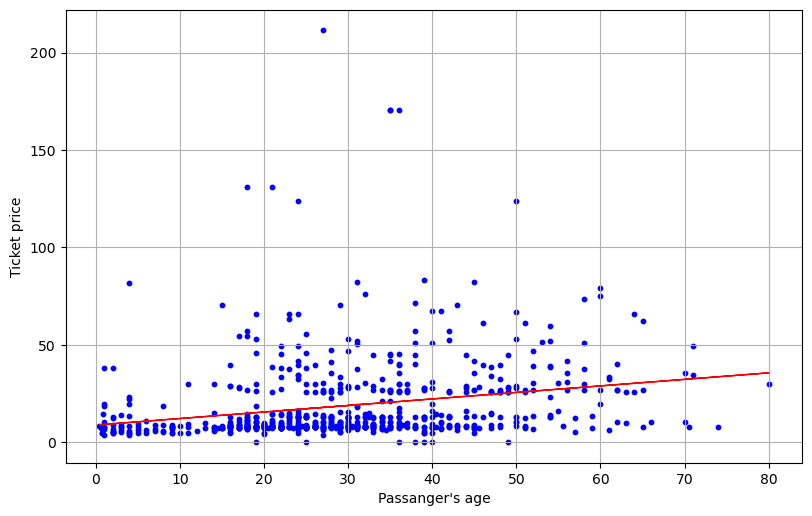

In [6]:
#TODO:
# Plot original data and predictions on the same graph
def plot_graph(X, y_true, y_pred, xlab):
    plt.figure(num=None, figsize=(9.5, 6), dpi=100, facecolor='w', edgecolor='k')
    plt.scatter(X, y_true,  color='blue', s=10)
    plt.plot(X, y_pred, color='red', linewidth=1)
    plt.ylabel('Ticket price')
    plt.xlabel(str(xlab))
    plt.grid()
    plt.show()

plot_graph(X, y_true, y_pred, "Passanger\'s age")

Is Age a good predictor for the Price of the ticket? Have a look at the data again. Is there a better predictor? <br>
**1.6 Choose another predictor and repeat the same steps (1.2-1.5). Report the better predictor. (0.5 points)**

Coeff: -17.069 and intercept: 56.908
Mean squared error using using formula: 252.321
Mean squared error using mean_squared_error method: 252.321


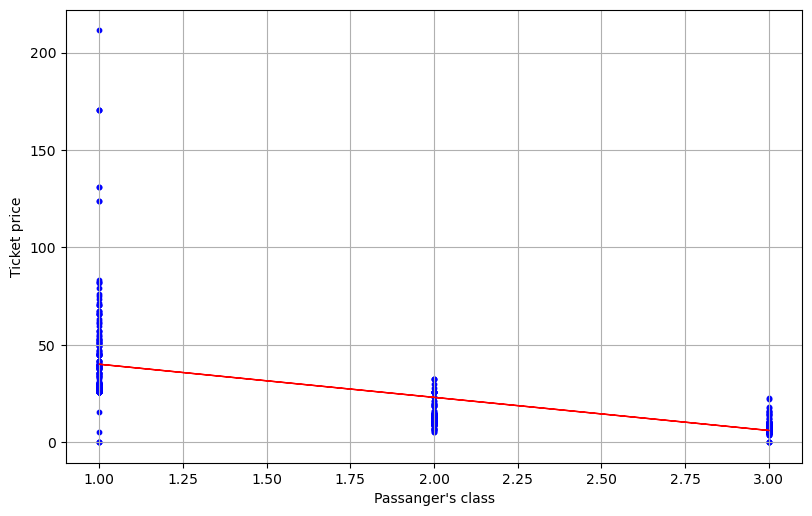

In [7]:
# TODO: Choose another predictor and repeat the same steps
lr = LinearRegression()
X = titanic["Pclass"].to_numpy().reshape(-1, 1) #Training data
lr.fit(X, y_true)
y_pred = np.round(lr.predict(X))

model_params(lr)
mse(y_true, y_pred)
plot_graph(X, y_true, y_pred, "Passanger\'s class")

**Pclass** is a better predictor for the price of the ticket.
*Answer:* $$ 
y = 56.908 +(-17.069) x
$$

We can go on and try to improve the fit even more by increasing the complexity of the model.<br>
**1.7 Consult this <a href="https://www.analyticsvidhya.com/blog/2020/03/polynomial-regression-python/">Tutorial</a> and fit polynomial regressions using the better predictor. (1.5 points)**<br>
1) Fit regressions of order 2, 5, and 10. <br>
2) Get parameters of the models and write down the equations for each model inserting the fitted parameters. <br>
3) Compute MSE for each model and compare them. Does increasing the capacity of the model improve its performance? <br>

In [8]:
## In this part we will be splitting the data into train and test set.

def poly_reg(deg, X_train, X_test, y_train, y_test):    
    print("Poly reg order: %d"%deg)
    Input = [('poly',PolynomialFeatures(degree=deg)),('lr',LinearRegression())]
    pipe = Pipeline(Input)
    pipe.fit(X_train,y_train)
    coef = pipe.named_steps.lr.coef_[0]
    print('MSE: %f'%mean_squared_error(y_test, pipe.predict(X_test)))
    reg_label = "Inliers coef:%s" % (np.array2string(coef, formatter={'float_kind': lambda fk: "%.4f" % fk}))
    print(reg_label,'\n')
    
X = titanic["Pclass"].to_numpy().reshape(-1, 1) #Training data
y_true = titanic["Price"].to_numpy().reshape(-1, 1) # Target values
X_train, X_test, y_train, y_test  = train_test_split(X,y_true, train_size=0.8,test_size=0.2)

poly_reg(2, X_train, X_test, y_train, y_test)
poly_reg(5, X_train, X_test, y_train, y_test)
poly_reg(10, X_train, X_test, y_train, y_test)

Poly reg order: 2
MSE: 83.231930
Inliers coef:[0.0000 -73.0934 13.5181] 

Poly reg order: 5
MSE: 83.231930
Inliers coef:[0.0000 -0.5433 -1.4294 -2.5998 -3.1352 1.2103] 

Poly reg order: 10
MSE: 83.202536
Inliers coef:[0.0000 -2706211.3148 -7971673.4969 -18381018.3073 -39216923.3802
 -74712148.4656 -144738169.8271 -248179768.9772 -96485492.3817
 269001463.0328 -67604098.6439] 



### Equations of the model
1. Deg=2
$$
y = 0.000*1 + (-65.6052)*x + (11.8913)*x^2
$$

2. Deg=5
$$
y = (0.0000)*1 + (-0.4969)*x + (-1.3073)*x^2 + (-2.3780)*x^3 + (2.8686)*x^4 + (1.1020)*x^5 
$$

3. Deg=10
$$
y = (0.0000)*1 + (4889877.8018)*x + (14310209.2356)*x^2 + (33187599.2074)*x^3 + (70503034.6237)*x^4 + (135112271.1602)*x^5 + (262386189.2531)*x^6 + (514924092.3815)*x^7 + (573052557.4249)*x^8 + (-852648818.0181)*x^9 + (197578978.0580)*x^{10}
$$

### Analysis
When increaseing the capacity of the model, the model tries to fit more data points but consequenctly will lose some other data points. Increasing the degree polynomial causes overfitting. Hence poly degree = 2 is most suited model among the given choices.

Now we will try to predict if a passenger survived based on the passenger class. <br>
Whether a passenger survived or not is a categorical variable, so we have to implement a **logistic** regression. <br>
Logistic regression will be covered in the lecture on the 1st of December, but you can already get acquainted with it in <a href = "https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc">this post</a>.

**1.8 Fit a <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html"> logistic regression </a> predicting if a passenger has survived based on their class. (0.5 points)** <br>



In [9]:
# TODO: fit a logistic regression (Pclass predicts Survived)
X = titanic["Pclass"].to_numpy().reshape(-1, 1) #Training data
y_true = titanic["Survived"] #Target values

logisticRegr = LogisticRegression()
logisticRegr.fit(X, y_true.values.ravel())
probablities = logisticRegr.predict_proba(X)
df_probab = pd.DataFrame(data=probablities, columns=["not-survived", "survived"])
df_probab.insert(0, "PassengerId", titanic['PassengerId'].to_numpy().tolist(), True) 
df_probab.insert(1, "Survived", titanic['Survived'].to_numpy().tolist(), True) 
df_probab.head()

,PassengerId,Survived,not-survived,survived
0,1,0,0.751782,0.248218
1,2,1,0.332183,0.667817
2,3,1,0.751782,0.248218
3,4,1,0.332183,0.667817
4,5,0,0.751782,0.248218


**1.9 Cross entropy loss. (1 point)** <br>
The measure that we use for estimating the error of a logistic regression is *Cross Entropy Loss*. <br>
Here is a good <a href="https://www.youtube.com/watch?v=jKQI75qKm3A"> video </a> explaining Maximum Likelihood Estimation and Cross Entropy Loss. <br>
Write the formula for Cross Entropy Loss and calculate the error of your model using this formula. Check your answer using the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html"> log_loss </a> method from sklearn.

*Cross Entropy Loss formula*: 
$$
H_P(Q) = -\frac{1}{N}\sum_{i}^{N}y_i \log (p_i) + (1 - y_i) \log (1 - p_i)
$$

Where: \
$N$: total number of samples \
$y$: class label \
$p$: probablity of survival


In [10]:
# TODO: compute Cross Entropy Loss and check it using log_loss method.
y = titanic['Survived'].to_numpy()
p = probablities[:,1]
cel = -np.sum(y*np.log(p) + (1-y)*np.log(1-p)) / len(y)
cel_method = log_loss(y_true, probablities)

print("Cross entropy loss using formula: %f" %cel)
print("Cross entropy loss using log_loss method: %f" %cel_method)

Cross entropy loss using formula: 0.609760
Cross entropy loss using log_loss method: 0.609760


**1.10 Fit a multiple logistic regression (0.5 points)** <br>
Now let's check if the Age of a passenger also had an influence on their survival chances. <br>
Fit a model with 2 predictors, compute the loss. Compare with the previous model.

In [11]:
# TODO: fit a multiple regression with Age and Pclass as predictors of survival.
#       Hint: the predictors should be in shape of a 2d array, Age and Pclass as columns.

X = titanic[['Age', 'Pclass']].to_numpy() #Training data
y = titanic["Survived"]
logisticRegr = LogisticRegression()
logisticRegr.fit(X, y.values.ravel())

probablities = logisticRegr.predict_proba(X)
cel_method = log_loss(y_true, probablities)
print("Cross entropy loss using log_loss method: %f" %cel_method)

Cross entropy loss using log_loss method: 0.579447


### Comparison
Multiple regression has better cross-entropy value and hence a better model because is prediction is constrained on two classes.

## 2 Evaluating the performance of a model

**2.1 Give definitions of terms overfitting and underfitting. <br>
How can we check if the model underfits, overfits or is optimal? (1 point)**

*Answer*:
- **Underfitting**: When the model is not powerful enough to capture salient patterns in data. Meaning eans it can not generalize to the new data. Such models/algorithm are unsuitable for experiments and often result in poor perfromance.
- **Overfitting**: When the model is too highly trained to the specific training examples, we call it overfitting. Meaning, it performs poorly on new examples.

 Cross-validation is used in order to estimate the model’s performance on unseen data. If the 
 - Training loss << validation loss: Overfitting 
 - Training loss and validation loss both high: Underfitting
 
 Underfitting or overfitting of a model can also decided experimentally by comparing their performance on the test data.

**2.2 Evaluation metrics (2 points)**<br>
Watch this <a href="https://www.youtube.com/watch?v=wpQiEHYkBys">video about evaluation metrics</a>. <br>
Discuss the differences between Accuracy, Precision, Recall, F1, MCC (Mathews Correlation Coeffcient): <br>
1. How are they calculated? <br>
2. In which case can a model get the perfect score? <br>
3. Give examples of situations when you would prefer one over the others. <br>
4. Getting back to our Titanic case: Imagine that you have to predict if the passenger survived or not and pass this information to the families. Which metric would you use? Why?


Answer:*
1. 
    - **Accuracy**
    $$A = \frac{\text{number of correct predictions}}{\text{total number of predictions}}$$

    - **Precision**
    $$Precision = \frac{TP}{TP+FP}$$

    - **Recall**
    $$Recall = \frac{TP}{TP+FN}$$

    - **F1**
    $$F1 = \frac{2*Precision*Recall}{Precision+Recall}\\  = \frac{2*TP}{2*TP+FP+FN}$$

    - **MCC (Mathews Correlation Coeffcient)**
    $$MCC =  \frac{TP*TN-FP*FN}{\sqrt{(TP+FP)(TP+FN)(TN+FP)(TN+FN)}}$$
    
2. 
We can achieve a perfect score in accuracy if there are no incorrect predictions.
    
3. 
For minimizing False Positives, it's better to choose Precision (for example, saving good letters from going into spam), for minimizing False Negatives - Recall (for example, for ensuring that sick patients are not sent home).\
MCC is often better than F1 since it takes into account all four categories of confusion matrix (TP, TN, FP, FN), but it doesn't work well for multiclass problems, only for binary problems.

4. 
F1 score is the best metric to predict if a passanger has survived or not since it captures the information of recall and precision which fits the situation best.